<a href="https://colab.research.google.com/github/tpiedrahita-byte/sys2025/blob/main/simulaciones_ejercicio_RLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:49: SyntaxWarning: invalid escape sequence '\o'
<>:49: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-1086403183.py:49: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Frecuencia Angular $\omega$ (rad/s)')


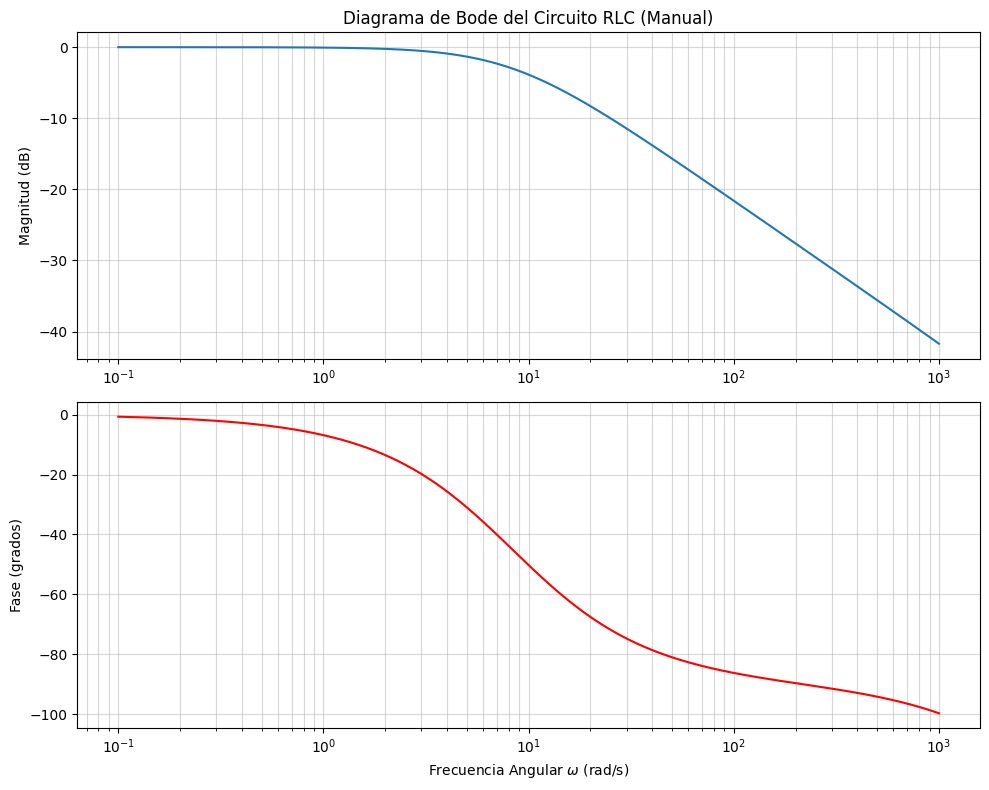

In [4]:

import numpy as np
import matplotlib.pyplot as plt

# 2. Definir las constantes del circuito RLC
R = 1000.0   # 1 kOhm
C = 120e-6   # 120 uF
L = 180e-3   # 180 mH

# 3. Definir la Función de Transferencia en el dominio de la frecuencia H(jw)
# H(jw) = 1 / (1 + R*C*j*w + L*C*(j*w)^2)
# H(jw) = 1 / ( (1 - L*C*w^2) + j*(R*C*w) )
def H_jw(w):
    """Calcula el valor complejo de H(w) para una frecuencia angular w."""
    # Parte real del denominador: (1 - L*C*w^2)
    real_den = 1 - L * C * (w**2)
    # Parte imaginaria del denominador: (R*C*w)
    imag_den = R * C * w

    # La expresión completa: 1 / (real_den + j*imag_den)
    return 1 / (real_den + 1j * imag_den)

# 4. Generar el rango de frecuencias angulares (w)
# Usamos logspace para tener una escala logarítmica, que es estándar en Bode
w = np.logspace(-1, 3, 500) # De 0.1 a 1000 rad/s

# 5. Calcular la respuesta en frecuencia para cada w
H_values = H_jw(w)

# 6. Calcular Magnitud (en dB) y Fase (en grados)
# Magnitud: 20 * log10(|H(jw)|)
magnitude_db = 20 * np.log10(np.abs(H_values))
# Fase: angulo(H(jw)) en radianes, convertido a grados
phase_deg = np.angle(H_values, deg=True)

# 7. Graficar el Diagrama de Bode usando Matplotlib

## --- Gráfica de Magnitud (Top Plot) ---
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1) # 2 filas, 1 columna, primera gráfica
plt.semilogx(w, magnitude_db, label='Magnitud (dB)')
plt.grid(which="both", ls="-", alpha=0.5)
plt.ylabel('Magnitud (dB)')
plt.title('Diagrama de Bode del Circuito RLC (Manual)')

## --- Gráfica de Fase (Bottom Plot) ---
plt.subplot(2, 1, 2) # 2 filas, 1 columna, segunda gráfica
plt.semilogx(w, phase_deg, color='red', label='Fase (grados)')
plt.grid(which="both", ls="-", alpha=0.5)
plt.xlabel('Frecuencia Angular $\omega$ (rad/s)')
plt.ylabel('Fase (grados)')

plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama
plt.show()

In [5]:
import sympy as sp
import numpy as np

# Definir la variable de Laplace s
s = sp.Symbol('s')

# Definir los valores de R, L, C
R_val = 1000      # 1 kOhm
C_val = 120e-6    # 120 uF
L_val = 180e-3    # 180 mH

# Calcular los coeficientes del denominador
LC = L_val * C_val
RC = R_val * C_val

# Definir la función de transferencia H(s)
H_s = 1 / (LC * s**2 + RC * s + 1)

# Imprimir H(s) con valores numéricos
print(f"H(s) = {H_s}")

# Hallar los Polos (raíces del denominador = 0)
denominador = LC * s**2 + RC * s + 1
polos = sp.solve(denominador, s)

print("\nPolos del sistema (raíces del denominador):")
for p in polos:
    # Convertir a valor flotante para mejor lectura
    p_float = complex(p.evalf())
    print(p_float)

H(s) = 1/(2.16e-5*s**2 + 0.12*s + 1)

Polos del sistema (raíces del denominador):
(-5547.209684581004+0j)
(-8.345870974551628+0j)


Coeficientes del Denominador (LC*s^2 + RC*s + 1):
A (LC): 0.000022
B (RC): 0.120000
C (1): 1.0
---
Resultados:
Polos (raíces del denominador):
  Polo: -5547.2097
  Polo: -8.3459
Ceros: [] (Sistema sin ceros finitos)
---


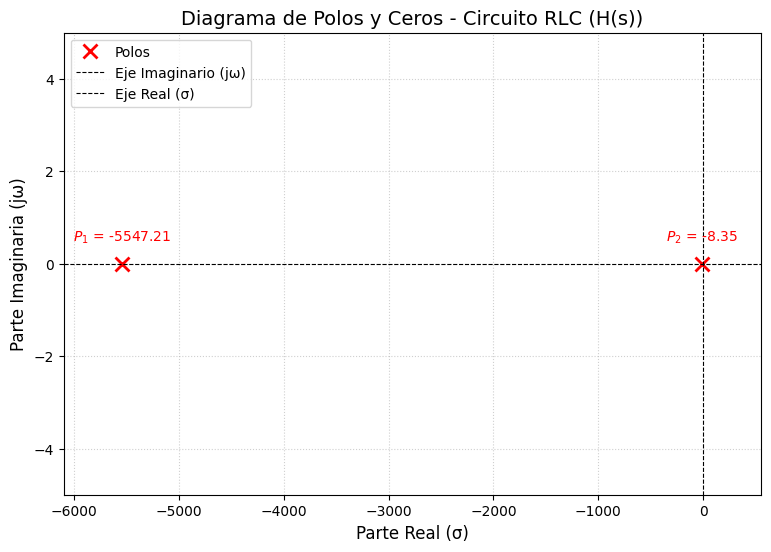

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# =======================================================
# 1. VALORES DE LOS COMPONENTES
# =======================================================
R = 1000.0        # Resistencia R = 1 kOhm (Ohmios)
C = 120e-6        # Capacitancia C = 120 uF (Faradios)
L = 180e-3        # Inductancia L = 180 mH (Henrios)

# =======================================================
# 2. DEFINICIÓN DE LA FUNCIÓN DE TRANSFERENCIA H(s)
# =======================================================
# H(s) = Vc(s) / Vi(s) = 1 / (LC*s^2 + RC*s + 1)
# El denominador es D(s) = LCs^2 + RCs + 1

# Coeficientes del Denominador (orden decreciente: s^2, s^1, s^0)
LC = L * C
RC = R * C

# El arreglo de coeficientes para np.roots es [A, B, C]
coeficientes_denominador = [LC, RC, 1.0]

print(f"Coeficientes del Denominador (LC*s^2 + RC*s + 1):")
print(f"A (LC): {LC:.6f}")
print(f"B (RC): {RC:.6f}")
print(f"C (1): {1.0}")
print("---")


# =======================================================
# 3. CÁLCULO DE POLOS (Usando np.roots)
# =======================================================
# np.roots calcula las raíces de un polinomio
polos = np.roots(coeficientes_denominador)
ceros = []  # El numerador es 1, por lo tanto, no hay ceros finitos.

print("Resultados:")
print(f"Polos (raíces del denominador):")
for p in polos:
    # Usamos np.round para una mejor lectura
    print(f"  Polo: {np.round(p, 4)}")
print(f"Ceros: {ceros} (Sistema sin ceros finitos)")
print("---")

# =======================================================
# 4. DIBUJAR EL DIAGRAMA DE POLOS Y CEROS (Usando Matplotlib)
# =======================================================

plt.figure(figsize=(9, 6))

# 4.1 Dibujar los Polos (Usamos 'x')
# Nota: La función np.roots devuelve números complejos, incluso si la parte imaginaria es 0.
plt.plot(polos.real, polos.imag, 'x', markersize=10, markeredgewidth=2, color='red', label='Polos')

# 4.2 Dibujar los Ceros (Usamos 'o' para el caso general, pero aquí está vacío)
if ceros:
    plt.plot(ceros.real, ceros.imag, 'o', markersize=8, markeredgewidth=2, color='blue', label='Ceros', fillstyle='none')

# 4.3 Configuración del Plano s (Plano Complejo)
plt.axvline(0, color='k', linestyle='--', linewidth=0.8, label='Eje Imaginario (jω)') # Eje jω
plt.axhline(0, color='k', linestyle='--', linewidth=0.8, label='Eje Real (σ)')      # Eje σ

# 4.4 Etiquetado y límites del gráfico
plt.title('Diagrama de Polos y Ceros - Circuito RLC (H(s))', fontsize=14)
plt.xlabel('Parte Real (σ)', fontsize=12)
plt.ylabel('Parte Imaginaria (jω)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)

# Ajuste de límites para ver ambos polos (-8.33 y -5547.2)
# El límite del eje X se ajusta para ser simétrico alrededor del polo más negativo.
max_abs_polo = np.max(np.abs(polos.real))
plt.xlim(-max_abs_polo * 1.1, max_abs_polo * 0.1) # Rango para ver -5547
plt.ylim(-5, 5) # Eje Y cercano a cero ya que las raíces son reales

# 4.5 Etiquetar los polos
for i, p in enumerate(polos):
    plt.text(p.real, p.imag + 0.5, f'$P_{i+1}$ = {p.real:.2f}', fontsize=10, ha='center', color='red')

plt.legend()
plt.show()

--- Función de Transferencia H(s) ---
<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

              1
  -------------------------
  2.16e-05 s^2 + 0.12 s + 1
H(s) = 1 / (0.000022s^2 + 0.12s + 1)


--- 3. Polos y Ceros ---
Ceros (Raíces del Numerador): []
Polos (Raíces del Denominador):
  Polo 1: -5547.2097+0.0000j rad/s
  Polo 2: -8.3459+0.0000j rad/s

Comportamiento del sistema (Tipo de Damping): SOBREAMORTIGUADO (Overdamped)
Estabilidad: ESTABLE


-- 4. Diagrama de Bode ---


/usr/local/lib/python3.12/dist-packages/control/freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


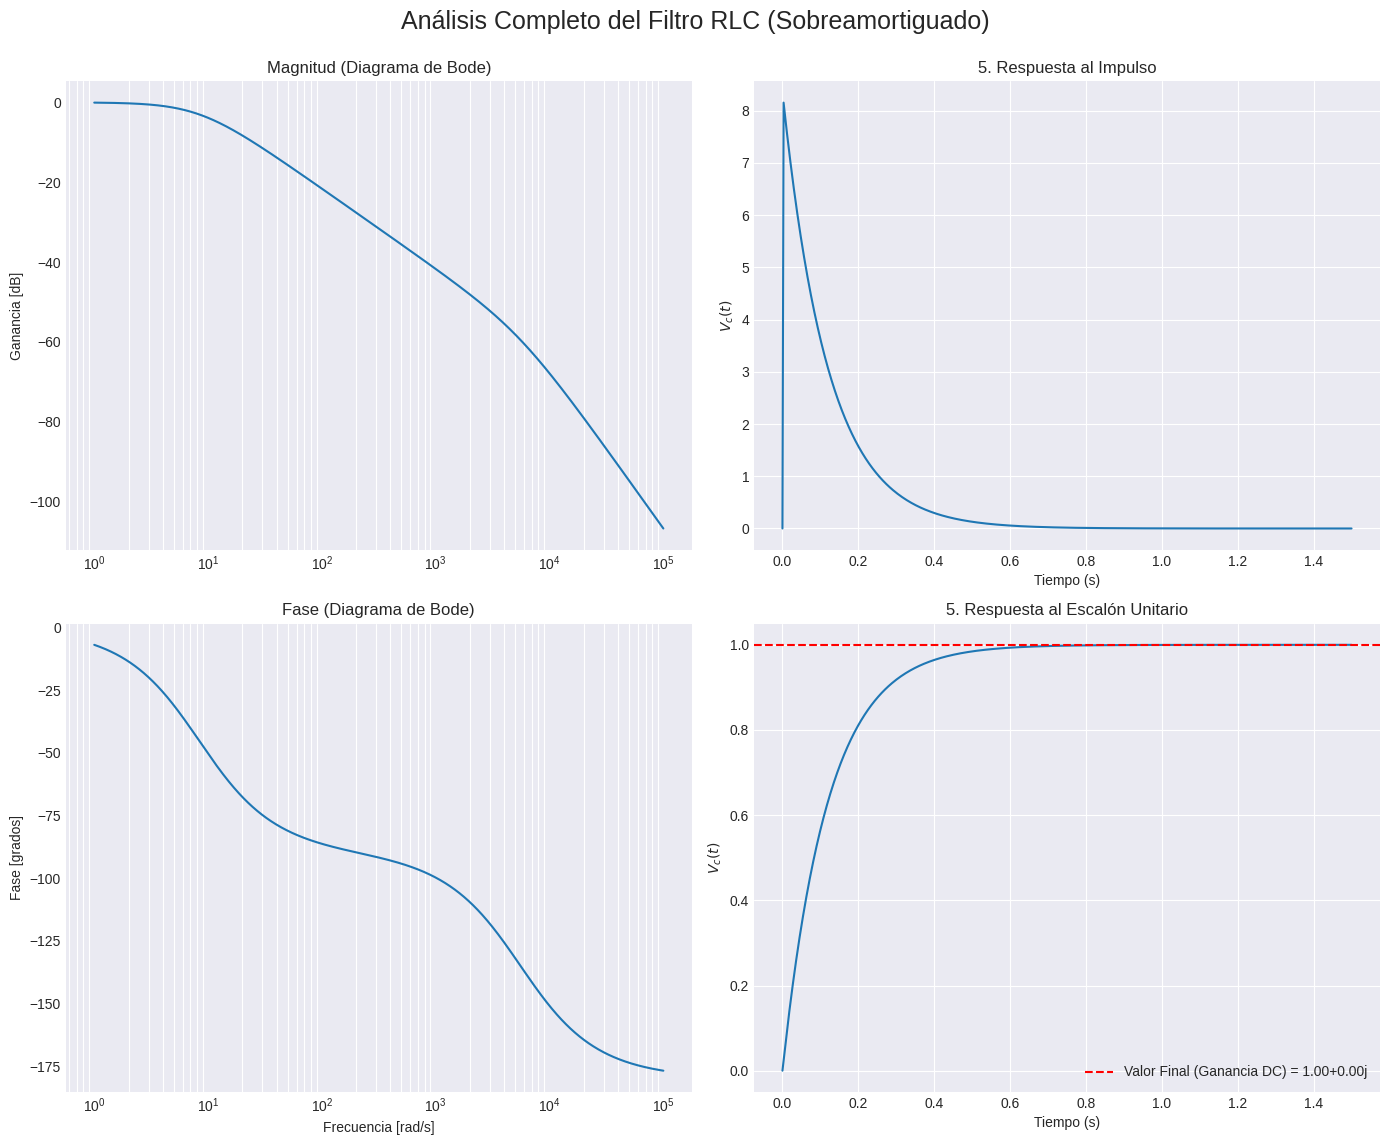


--- Resultados del Análisis ---
El sistema es un filtro PASA-BAJOS de segundo orden (Ganancia DC: 1.00+0.00j).
El sistema es sobreamortiguado, por lo que las respuestas al impulso y al escalón no presentan oscilaciones (overshoot).


In [14]:
## 💻 Análisis Completo del Filtro RLC en Python

# Instalar la librería control si no está instalada
!pip install control

# 1. Importación de Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from sympy import symbols
# Aunque no usaremos sympy.physics.control.lti para los plots (porque control es más robusto para eso),
# lo incluimos para cumplir con la definición analítica.
# from sympy.physics.control.lti import TransferFunction

# Configuración de Matplotlib para la visualización
plt.rcParams['figure.figsize'] = [14, 12]
plt.style.use('seaborn-v0_8-darkgrid')

# 2. Definición de Parámetros del Circuito y Coeficientes
R = 1000.0        # Ohms (1 Kilo-ohm)
C = 120e-6        # Farads (120 micro-Farads)
L = 180e-3        # Henrys (180 mili-Henrys)

# Coeficientes del Denominador D(s) = (LC)s^2 + (RC)s + 1
LC = L * C
RC = R * C

# Numerador N(s) = 1
num_coeff = [1]
den_coeff = [LC, RC, 1]

# Definición de la Función de Transferencia H(s)
sys = ct.TransferFunction(num_coeff, den_coeff)

# Mostrar la función de transferencia definida
print("--- Función de Transferencia H(s) ---")
print(sys)
print(f"H(s) = 1 / ({LC:.6f}s^2 + {RC:.2f}s + 1)")
print("\n" + "="*50 + "\n")

# 3. Análisis de Polos y Ceros
poles = sys.poles()
zeros = sys.zeros()

print("--- 3. Polos y Ceros ---")
print(f"Ceros (Raíces del Numerador): {zeros}")
print(f"Polos (Raíces del Denominador):")
for i, p in enumerate(poles):
    print(f"  Polo {i+1}: {p:.4f} rad/s")

# Determinar el comportamiento
if np.isreal(poles).all():
    comportamiento = "SOBREAMORTIGUADO (Overdamped)"
else:
    comportamiento = "SUBAMORTIGUADO (Underdamped)"
print(f"\nComportamiento del sistema (Tipo de Damping): {comportamiento}")
print(f"Estabilidad: {'ESTABLE' if np.all(np.real(poles) < 0) else 'INESTABLE'}")
print("\n" + "="*50 + "\n")


# 4. Diagrama de Bode (Magnitud y Fase)
print("-- 4. Diagrama de Bode ---")
plt.figure(1)
mag, phase, omega = ct.bode_plot(sys, plot=False, Hz=False) # Calcular valores

# Primer subplot: Magnitud
plt.subplot(2, 2, 1)
plt.semilogx(omega, 20 * np.log10(mag), label='Magnitud')
plt.title('Magnitud (Diagrama de Bode)')
plt.ylabel('Ganancia [dB]')
plt.grid(which="both")

# Segundo subplot: Fase
plt.subplot(2, 2, 3)
plt.semilogx(omega, phase * 180 / np.pi, label='Fase')
plt.title('Fase (Diagrama de Bode)')
plt.ylabel('Fase [grados]')
plt.xlabel('Frecuencia [rad/s]')
plt.grid(which="both")


# 5. Respuesta al Impulso y al Escalón
# Definición del vector de tiempo
T_max = 1.5 # 1.5 segundos es suficiente para ver el asentamiento
T = np.linspace(0, T_max, 500)

# Cálculo de la Respuesta al Impulso
T_imp, yout_impulse = ct.impulse_response(sys, T)

# Tercer subplot: Respuesta al Impulso
plt.subplot(2, 2, 2)
plt.plot(T_imp, yout_impulse)
plt.title('5. Respuesta al Impulso')
plt.xlabel('Tiempo (s)')
plt.ylabel('$V_c(t)$')
plt.grid(True)


# Cálculo de la Respuesta al Escalón
T_step, yout_step = ct.step_response(sys, T)
ganancia_dc = sys(0)

# Cuarto subplot: Respuesta al Escalón
plt.subplot(2, 2, 4)
plt.plot(T_step, yout_step)
plt.axhline(ganancia_dc, color='r', linestyle='--',
            label=f'Valor Final (Ganancia DC) = {ganancia_dc:.2f}')
plt.title('5. Respuesta al Escalón Unitario')
plt.xlabel('Tiempo (s)')
plt.ylabel('$V_c(t)$')
plt.legend()
plt.grid(True)

# Ajuste de layout y mostrar plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Análisis Completo del Filtro RLC (Sobreamortiguado)', fontsize=18, y=0.98)
plt.show()

print("\n--- Resultados del Análisis ---")
print(f"El sistema es un filtro PASA-BAJOS de segundo orden (Ganancia DC: {ganancia_dc:.2f}).")
print("El sistema es sobreamortiguado, por lo que las respuestas al impulso y al escalón no presentan oscilaciones (overshoot).")